In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [2]:
leads = pd.read_csv("Downloads/Leads.csv")

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# check for duplicated values
leads.duplicated().sum()

0

In [8]:
# There is no dupolicated values in the dataset

# Data cleaning and treatment

In [9]:
# Converting select values to NAN
leads = leads.replace("Select",np.nan)

In [10]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
# Checking the null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
# checking the null values in terms of percentage
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
# dropping the columns which have more than 45% of null values
percentage = leads.isnull().sum() *100 /leads.shape[0] 
drop_columns = percentage[percentage > 45]

In [14]:
leads.drop(drop_columns.index,inplace=True,axis=1)

In [15]:
leads.shape

(9240, 30)

In [16]:
# Again checking the null values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

# Dealing with the columns still having null values

In [17]:
# column lead Source

In [18]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [19]:
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,"Google")

In [20]:
leads['Lead Source'].value_counts(dropna=False)

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [21]:
# Combining all the other categories to Others
leads['Lead Source'] = leads["Lead Source"].replace(["Facebook","bing","google","Click2call",
                                                     "Press_Release","Social Media","Live Chat",
                                                    "youtubechannel","testone","Pay per Click Ads",
                                                    "welearnblog_Home","WeLearn","blog","NC_EDM"] ,'Others') 

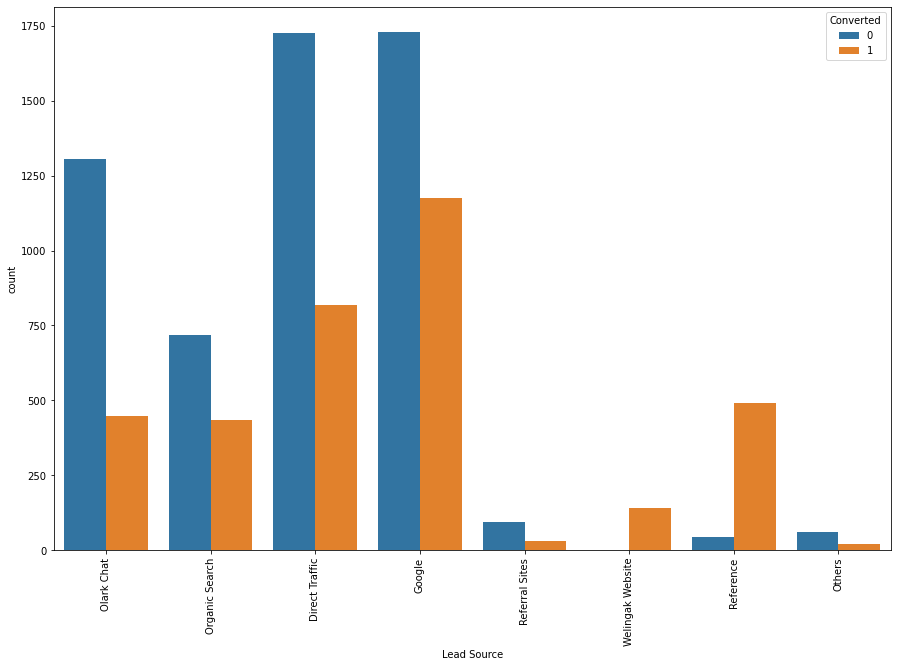

In [22]:
plt.figure(figsize=(15,10))
s1 = sns.countplot(leads["Lead Source"],hue=leads["Converted"])
plt.xticks(rotation=90)
plt.show()

In [23]:
# Maximum number of leads are generated by Google and Direct traffic.

In [24]:
# column TotalVisits

In [25]:
leads['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [26]:
leads["TotalVisits"] = leads["TotalVisits"].replace(np.nan,0.0)

In [27]:
leads['TotalVisits'].value_counts(dropna=False)

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [28]:
# column Page Views Per Visit

In [29]:
leads['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [30]:
leads["Page Views Per Visit"] = leads["Page Views Per Visit"].replace(np.nan,0.0)

In [31]:
leads['Page Views Per Visit'].value_counts(dropna=False)

0.00    2326
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [32]:
# Again checking the null values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [33]:
# column Last Activity

In [34]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [35]:
leads['Last Activity'] = leads['Last Activity'].replace(np.nan,"Others")
# Combining all the other categories to Others
leads['Last Activity'] = leads["Last Activity"].replace(["Unreachable","Unsubscribed",
                                                         "Had a Phone Conversation","Approached upfront",
                                                        "View in browser link Clicked","Email Received",
                                                        "Email Marked Spam","Visited Booth in Tradeshow",
                                                        "Resubscribed to emails"] ,'Others') 

In [36]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [37]:
# Column country

In [38]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [39]:
# Replace the null values in this column by India because India is most occurance value
leads['Country'] = leads['Country'].replace(np.nan,'India')

In [40]:
leads['Country'].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

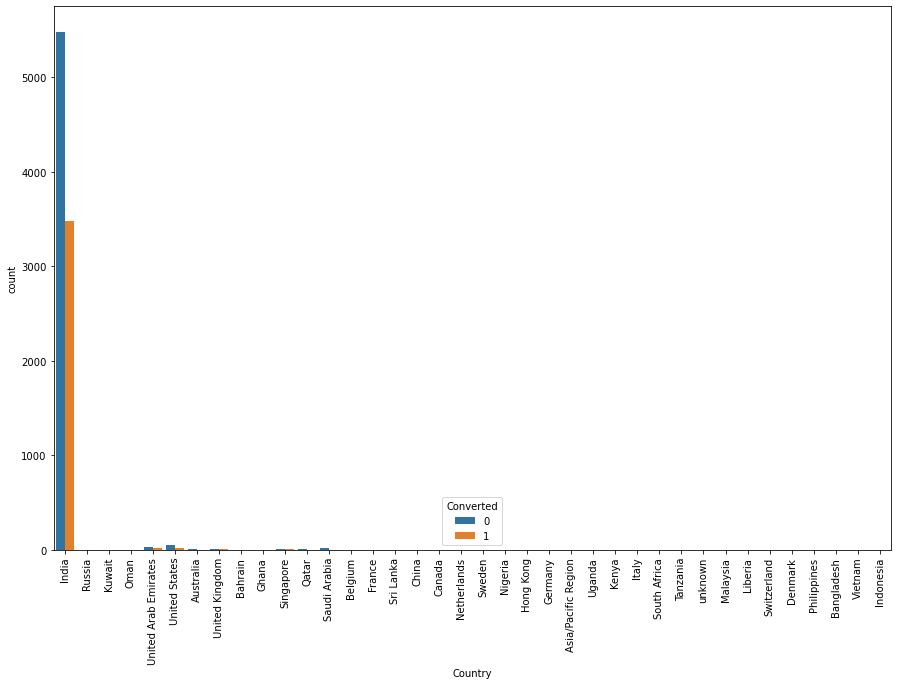

In [41]:
plt.figure(figsize=(15,10))
s1 = sns.countplot(leads["Country"],hue=leads["Converted"])
plt.xticks(rotation=90)
plt.show()

In [42]:
# As you see in this column we have only India and it has very large values, which will affect our analysis.Therefore, we 
# are dropping this column. 

In [43]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [44]:
# column Specialization

In [45]:
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [46]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

In [47]:
leads['Specialization'].value_counts(dropna=False)

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

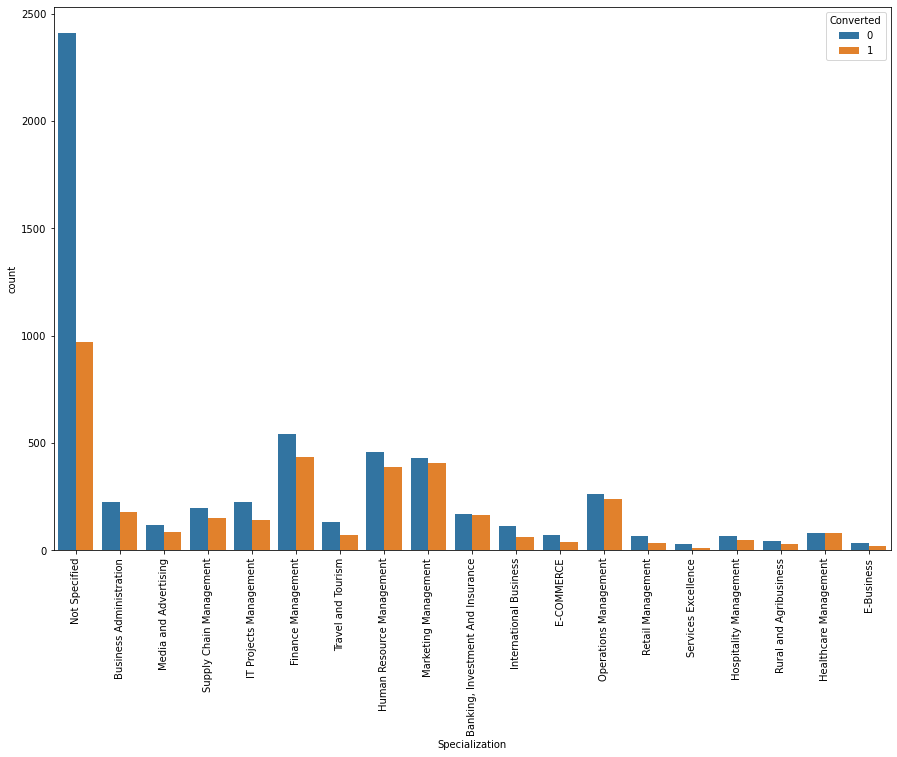

In [48]:
plt.figure(figsize=(15,10))
s1 = sns.countplot(leads["Specialization"],hue=leads["Converted"])
plt.xticks(rotation=90)
plt.show()

In [49]:
# Combining all the managment specialization together because they show similar trend
leads['Specialization'] = leads['Specialization'].replace(['Supply Chain Management','IT Projects Management','Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management','Retail Management',
                                                            'Healthcare Management','Hospitality Management',
                                                           ] ,'Management_Specializations') 

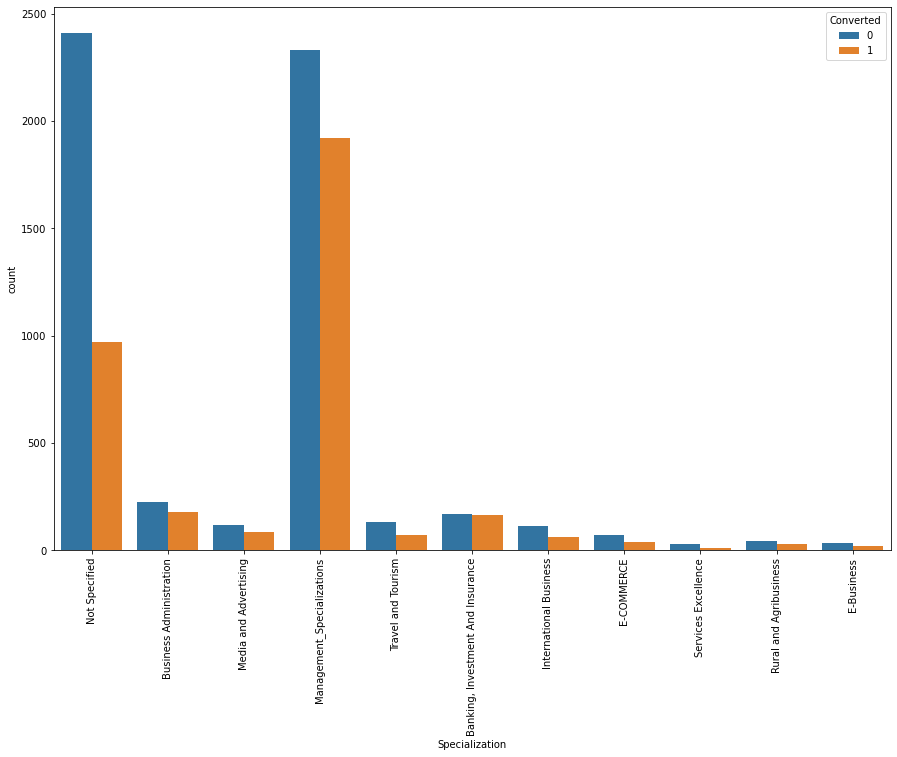

In [50]:
plt.figure(figsize=(15,10))
s1 = sns.countplot(leads["Specialization"],hue=leads["Converted"])
plt.xticks(rotation=90)
plt.show()

In [51]:
# column What is your current occupation

In [52]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [53]:
# replacing Nan values with Other
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Other')
leads['What is your current occupation'] = leads['What is your current occupation'].replace(["Housewife",
                                                                                             "Businessman"] ,'Other') 

In [54]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Other                   2724
Working Professional     706
Student                  210
Name: What is your current occupation, dtype: int64

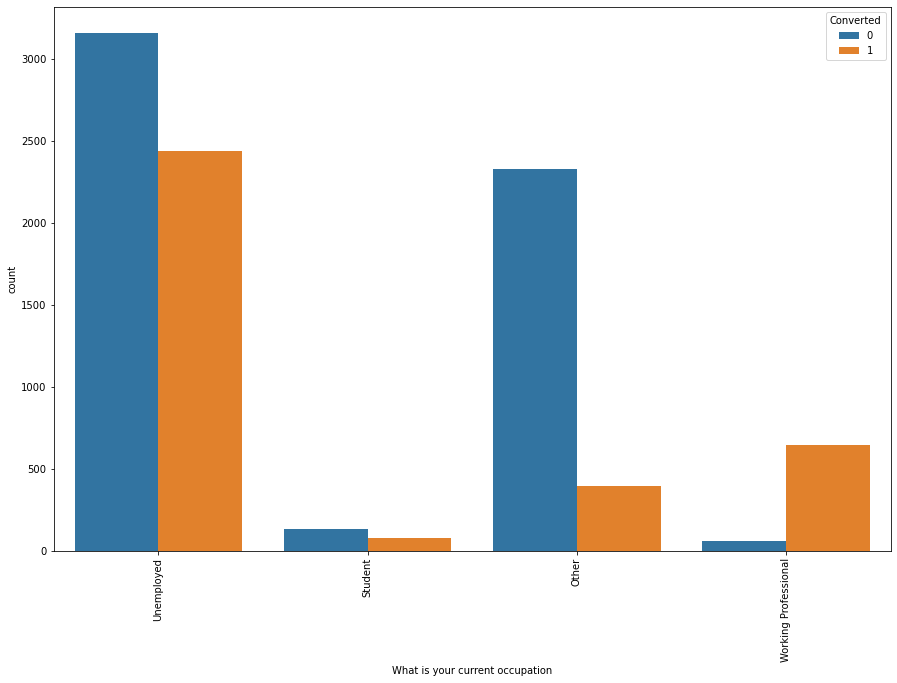

In [55]:
plt.figure(figsize=(15,10))
s1 = sns.countplot(leads["What is your current occupation"],hue=leads["Converted"])
plt.xticks(rotation=90)
plt.show()

In [56]:
# Working professional going for this course having high chances of joining it

In [57]:
# column What matters most to you in choosing a course

In [58]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [59]:
# replacing Nan values with most occur value i.e Better Career Prospects
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [60]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

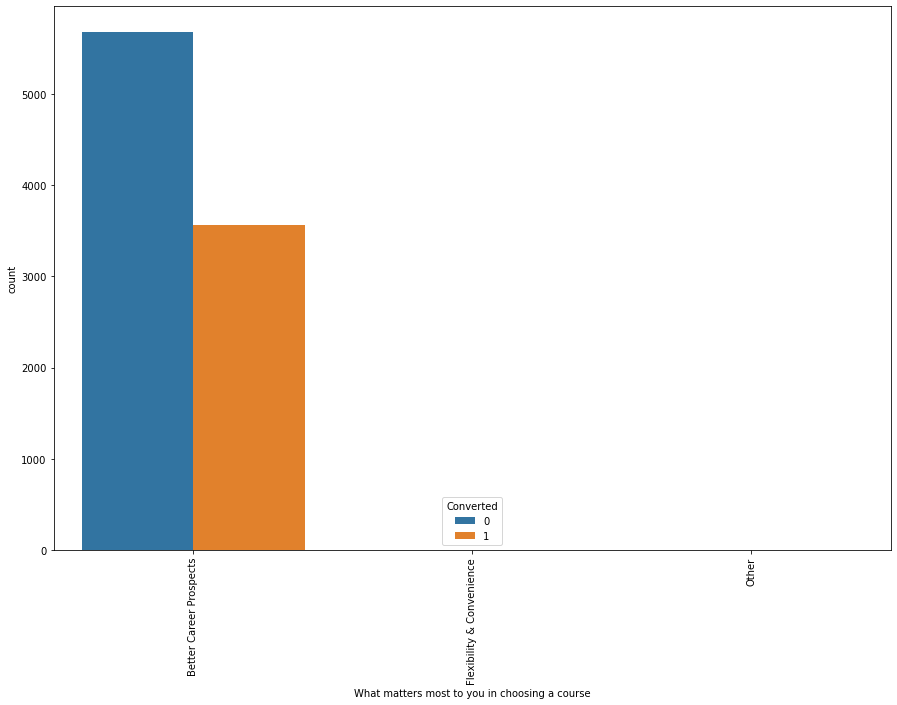

In [61]:
plt.figure(figsize=(15,10))
s1 = sns.countplot(leads["What matters most to you in choosing a course"],hue=leads["Converted"])
plt.xticks(rotation=90)
plt.show()

In [62]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [63]:
# column Tags

In [64]:
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [65]:
leads['Tags'] = leads['Tags'].replace(np.nan,"Not Specified")

In [66]:
leads['Tags'].value_counts(dropna=False)

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [67]:
# Combining all the other categories to Other_tags
leads['Tags'] = leads['Tags'].replace(["invalid number","Diploma holder (Not Eligible)",
                                                          "wrong number given","opp hangup",
                                                          "number not provided","in touch with EINS",
                                                          "Lost to Others","Still Thinking",
                                                          "Want to take admission but has financial problems",
                                                          "In confusion whether part time or DLP",
                                                          "Interested in Next batch","Lateral student",
                                                          "Shall take in the next coming month",
                                                          "University not recognized",
                                                          "Recognition issue (DEC approval)"] ,'Other_tags') 

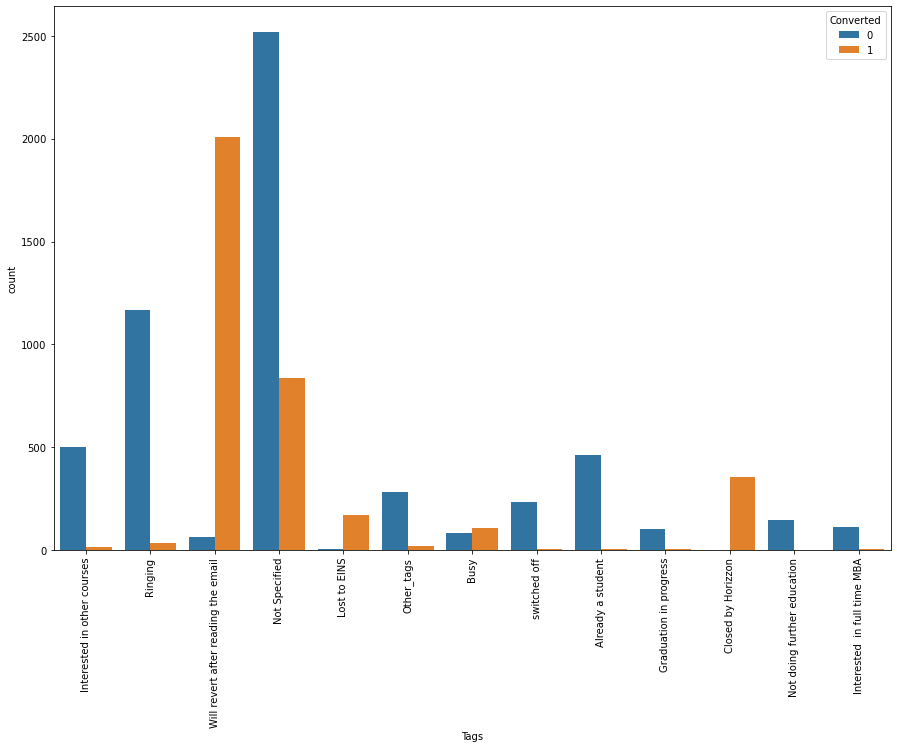

In [68]:
plt.figure(figsize=(15,10))
s1 = sns.countplot(leads["Tags"],hue=leads["Converted"])
plt.xticks(rotation=90)
plt.show()

In [69]:
# column city

In [70]:
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [71]:
# replacing Nan values with most occur value i.e mumbai
leads['City'] = leads['City'].replace(np.nan,'Other')

In [72]:
leads['City'].value_counts(dropna=False)

Other                          3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

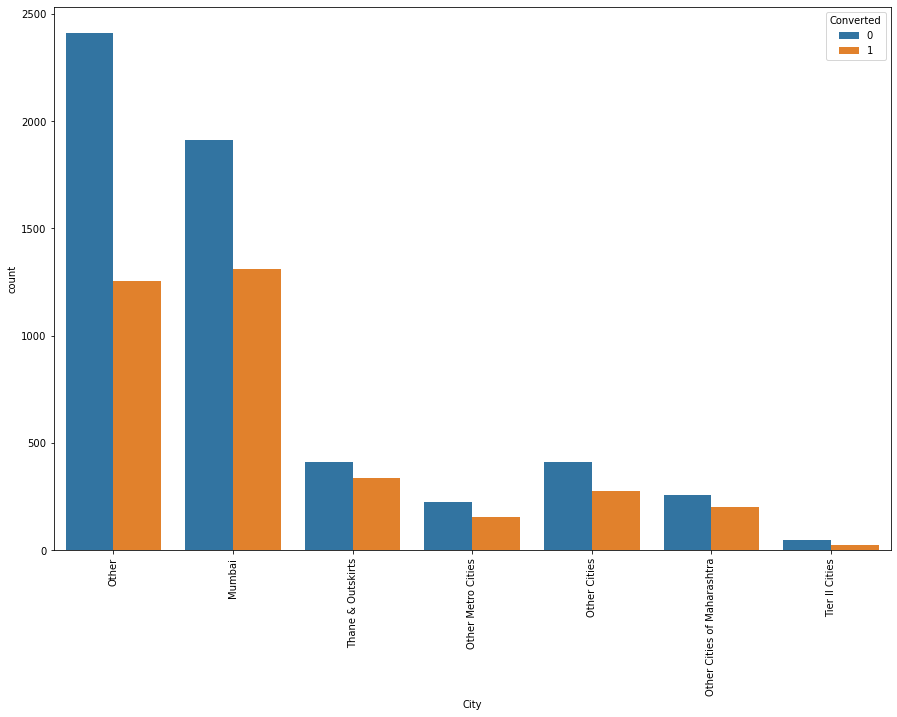

In [73]:
plt.figure(figsize=(15,10))
s1 = sns.countplot(leads["City"],hue=leads["Converted"])
plt.xticks(rotation=90)
plt.show()

In [74]:
# checking the null values in terms of percentage
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [75]:
# Dropping Prospect ID and Lead Number
cols_to_drop.append("Prospect ID")
cols_to_drop.append("Lead Number")
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number']

# Checking and dropping the columns

In [76]:
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [77]:
# Combining all the other categories to Other_Notable_activity
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(["Email Bounced",
                                                                        "Unsubscribed","Unreachable",
                                                                        "Had a Phone Conversation",
                                                                        "Email Marked Spam","Approached upfront",
                                                                        "Resubscribed to emails",
                                                                         "View in browser link Clicked",
                                                                        "Form Submitted on Website","Email Received"]
                                                                        ,'Other_Notable_activity') 

In [78]:
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [79]:
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [80]:
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [81]:
# We can drop column Do Not Call since it has 90% value is of one value

In [82]:
# Dropping Do Not Call
cols_to_drop.append("Do Not Call")
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number',
 'Do Not Call']

In [83]:
leads['Converted'].value_counts(dropna=False)

0    5679
1    3561
Name: Converted, dtype: int64

In [84]:
leads['TotalVisits'].value_counts(dropna=False)

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [85]:
leads['Total Time Spent on Website'].value_counts(dropna=False)

0       2193
60        19
74        18
75        18
127       18
        ... 
1701       1
1952       1
1229       1
1743       1
927        1
Name: Total Time Spent on Website, Length: 1731, dtype: int64

In [86]:
leads['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [87]:
# Dropping the column Search as of 90% values is of one value
# Dropping Search
cols_to_drop.append("Search")
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number',
 'Do Not Call',
 'Search']

In [88]:
leads['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [89]:
# Dropping Magazine
cols_to_drop.append("Magazine")
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number',
 'Do Not Call',
 'Search',
 'Magazine']

In [90]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [91]:
# Dropping Newspaper Article
cols_to_drop.append("Newspaper Article")
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article']

In [92]:
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [93]:
# Dropping Newspaper Article
cols_to_drop.append("X Education Forums")
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums']

In [94]:
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [95]:
# Dropping Newspaper
cols_to_drop.append("Newspaper")
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper']

In [96]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [97]:
# Dropping Digital Advertisement
cols_to_drop.append("Digital Advertisement")
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement']

In [98]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [99]:
# Dropping Through Recommendations
cols_to_drop.append("Through Recommendations")
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [100]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [101]:
# Dropping Receive More Updates About Our Courses
cols_to_drop.append("Receive More Updates About Our Courses")
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses']

In [102]:
leads['Tags'].value_counts(dropna=False)

Not Specified                          3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Other_tags                              302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [103]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [104]:
# Dropping Update me on Supply Chain Content
cols_to_drop.append("Update me on Supply Chain Content")
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content']

In [105]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [106]:
# Dropping Get updates on DM Content
cols_to_drop.append("Get updates on DM Content")
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content']

In [107]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [108]:
# Dropping Get updates on DM Content
cols_to_drop.append("I agree to pay the amount through cheque")
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [109]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Prospect ID',
 'Lead Number',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [110]:
#dropping columns
leads = leads.drop(cols_to_drop,1)

In [111]:
leads.shape

(9240, 14)

In [112]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [113]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Other,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Other,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [114]:
# checking correlation

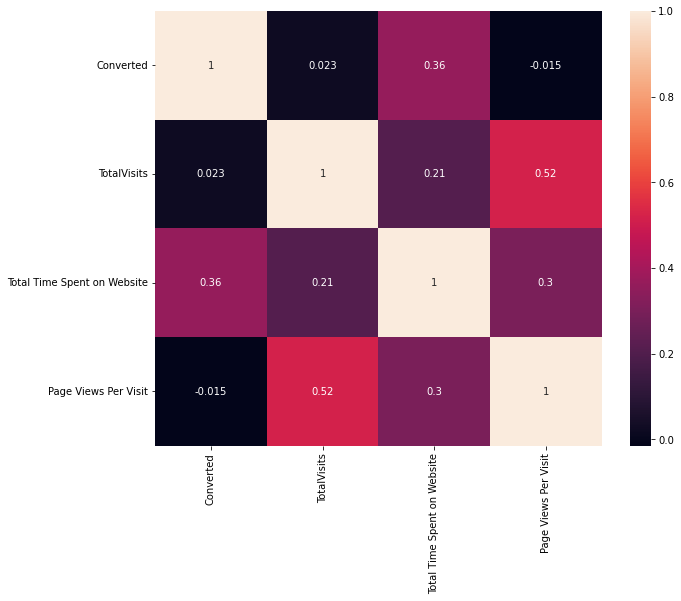

In [115]:
plt.figure(figsize=(10,8))
sns.heatmap(leads.corr(),annot=True)
plt.show()

# Checking the outliers for the numerical variables

In [116]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

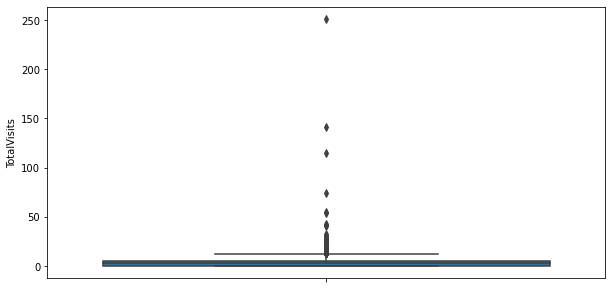

In [117]:
#Total Visits

plt.figure(figsize=(10,5))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [118]:
leads["TotalVisits"].describe()

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [119]:
#Handling the outliers
upper_quartile = np.percentile(leads["TotalVisits"], 75)
lower_quartile = np.percentile(leads["TotalVisits"], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = leads["TotalVisits"][leads["TotalVisits"]<=upper_quartile+1.5*iqr].max()
lower_whisker = leads["TotalVisits"][leads["TotalVisits"]>=lower_quartile-1.5*iqr].min()


leads['TotalVisits'] = leads['TotalVisits'].apply(lambda x: upper_quartile  if x > upper_whisker else x)

upper_quartile

5.0

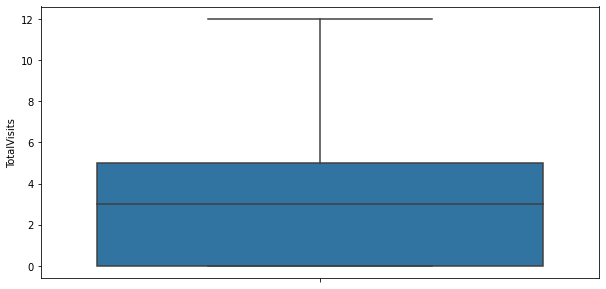

In [120]:
#Total Visits

plt.figure(figsize=(10,5))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

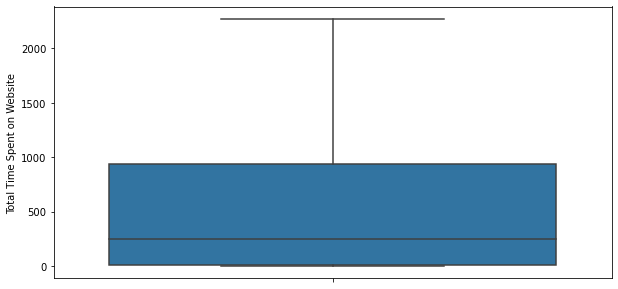

In [121]:
#Total Time Spent on Website

plt.figure(figsize=(10,5))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

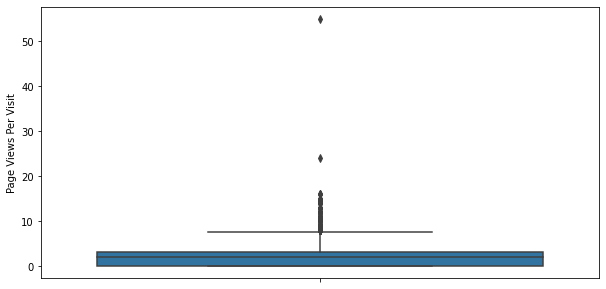

In [122]:
# Page Views Per Visit

plt.figure(figsize=(10,5))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [123]:
#Handling the outliers
upper_quartile = np.percentile(leads["Page Views Per Visit"], 75)
lower_quartile = np.percentile(leads["Page Views Per Visit"], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = leads["Page Views Per Visit"][leads["Page Views Per Visit"]<=upper_quartile+1.5*iqr].max()
lower_whisker = leads["Page Views Per Visit"][leads["Page Views Per Visit"]>=lower_quartile-1.5*iqr].min()


leads['Page Views Per Visit'] = leads['Page Views Per Visit'].apply(lambda x: upper_quartile  if x > upper_whisker else x)

upper_quartile

3.0

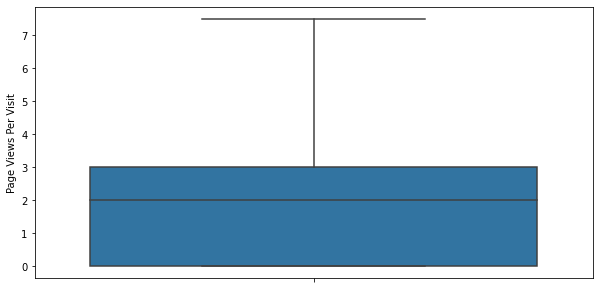

In [124]:
# Page Views Per Visit

plt.figure(figsize=(10,5))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [125]:
# No outliers

In [126]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Other,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Other,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


# Dummy Variable Creation

In [127]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [128]:
# categorical columns
categorical_cols= leads.select_dtypes(include=['object']).columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [129]:
leads["Do Not Email"].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [130]:
leads["A free copy of Mastering The Interview"].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [131]:
leads["Last Notable Activity"].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [132]:
# changing Do Not Email and A free copy of Mastering The Interview in to 1's and 0's

In [133]:
leads["Do Not Email"] = leads["Do Not Email"].map({"Yes":1,"No":0})

In [134]:
leads.tail()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Others,Management_Specializations,Unemployed,Will revert after reading the email,Mumbai,No,Other_Notable_activity
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Other_tags,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Other_tags,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,Management_Specializations,Other,Not Specified,Other Metro Cities,No,SMS Sent
9239,Landing Page Submission,Direct Traffic,0,1,6.0,1279,3.00,SMS Sent,Management_Specializations,Unemployed,Will revert after reading the email,Other Cities,Yes,Modified


In [135]:
leads["A free copy of Mastering The Interview"] = leads["A free copy of Mastering The Interview"].map({"Yes":1,"No":0})

In [136]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Other,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Other,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [137]:
leads["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [138]:
leads["Last Activity"].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [139]:
leads["Last Notable Activity"].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [140]:
# getting dummies and adding the result to the leads
dummy = pd.get_dummies(leads[['Lead Origin', 'What is your current occupation','City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [141]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [142]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [143]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [144]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [145]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [146]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,1,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,1,0


In [147]:
#dropping the original columns after dummy variable creation

leads.drop(categorical_cols,1,inplace = True)

In [148]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1.0,305,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## Train-Test Split

In [149]:
y = leads['Converted']
X=leads.drop('Converted', axis=1)

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [150]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,305,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [151]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [152]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6468 non-null   float64
 1   Total Time Spent on Website                           6468 non-null   int64  
 2   Page Views Per Visit                                  6468 non-null   float64
 3   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 5   Lead Origin_Lead Import                               6468 non-null   uint8  
 6   Lead Origin_Quick Add Form                            6468 non-null   uint8  
 7   What is your current occupation_Student               6468 non-null   uint8  
 8   What is your current occupation_Unemployed            6

In [153]:
#scaling numeric columns

scaler = StandardScaler()

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
1871,-1.148883,-0.885371,-1.240087,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6795,0.375576,0.005716,-0.477983,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.756690,-0.691418,0.192439,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8105,0.756690,1.365219,1.624964,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3934,-1.148883,-0.885371,-1.240087,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building using RFE:

In [154]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [155]:
rfe.support_

array([False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [156]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 21),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', False, 7),
 ('Lead Origin_Lead Import', False, 18),
 ('Lead Origin_Quick Add Form', False, 33),
 ('What is your current occupation_Student', False, 3),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other', False, 44),
 ('City_Other Cities', False, 32),
 ('City_Other Cities of Maharashtra', False, 40),
 ('City_Other Metro Cities', False, 39),
 ('City_Thane & Outskirts', False, 42),
 ('City_Tier II Cities', False, 31),
 ('Lead Source_Direct Traffic', False, 30),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Reference', False, 35),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Las

In [157]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Other_tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

In [158]:
#BUILDING MODEL 1

X_train_sm = sm.add_constant(X_train[col])
l_model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = l_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1396.4
Date:                Sun, 16 Oct 2022   Deviance:                       2792.7
Time:                        17:44:00   Pearson chi2:                 1.06e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5631      0.088    -29.114      0.000      -2.736      -2.391
What is your current occupation_Unemployed               2.2634      0.117     19.370      0.000       2.034       2.492
What is your current occupation_Working Professional     2.5416      0.356      7.149      0.000       1.845       3.238
Lead Source_Welingak Website                             2.9473      0.733      4.021      0.000       1.511       4.384
Last Activity_SMS Sent                                   2.0669      0.109     18.950      0.000       1.853       2.281
Tags_Already a student                                  -4.8662      0.718     -6.774      0.000      -6.274      -3.458
Tags_Closed by Horizzon                                  5.8904      1.010      5.829      0.000       3.910       7.871
Tags_Graduation in progress                             -2.5781      0.493     -5.228      0.000      -3.545      -1.612
Tags_Interested  in full time MBA                       -3.8136      0.736     -5.184      0.000      -5.255      -2.372
Tags_Interested in other courses                        -3.4071      0.325    -10.479      0.000      -4.044      -2.770
Tags_Lost to EINS                                        5.5233      0.727      7.601      0.000       4.099       6.948
Tags_Not doing further education                        -4.6677      1.015     -4.599      0.000      -6.657      -2.678
Tags_Other_tags                                         -3.0611      0.271    -11.300      0.000      -3.592      -2.530
Tags_Ringing                                            -4.4302      0.233    -19.033      0.000      -4.886      -3.974
Tags_Will revert after reading the email                 3.3450      0.183     18.256      0.000       2.986       3.704
Tags_switched off                                       -4.8710      0.522     -9.334      0.000      -5.894      -3.848
========================================================================================================================
"""

In [159]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.33
11,Tags_Other_tags,1.29
14,Tags_switched off,1.24
10,Tags_Not doing further education,1.14
7,Tags_Interested in full time MBA,1.10
2,Lead Source_Welingak Website,1.09
6,Tags_Graduation in progress,1.09
9,Tags_Lost to EINS,1.06
1,What is your current occupation_Working Profes...,0.95
8,Tags_Interested in other courses,0.44


In [160]:
# All the VIF values are good and the p values are less than 0.05

In [161]:
X_train_sm

,const,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
1871,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6795,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3516,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8105,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3934,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
79,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8039,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6936,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Apply Prediction

In [162]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.008750
6795    0.425624
3516    0.008750
8105    0.065190
3934    0.425624
4844    0.995461
3297    0.008750
8071    0.997182
987     0.071552
7423    0.994013
dtype: float64

In [163]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00874985, 0.42562391, 0.00874985, 0.06518994, 0.42562391,
       0.99546066, 0.00874985, 0.99718208, 0.07155235, 0.99401326])

In [164]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID
0,0,0.008750,1871
1,0,0.425624,6795
2,0,0.008750,3516
3,0,0.065190,8105
4,0,0.425624,3934


In [165]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.tail()

,Converted,Conversion_prob,Prospect ID,Predicted
6463,1,0.954580,350,1
6464,1,0.965227,79,1
6465,1,0.425624,8039,0
6466,0,0.053259,6936,0
6467,0,0.071552,5640,0


## Model Evaluation

In [166]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3912,   90],
       [ 458, 2008]], dtype=int64)

In [167]:
# Predicted        No         Yes
# Actual
# No              3912      90
# Yes             458      2008

In [168]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9152752009894867

In [169]:
# Accuracy comes out to be 89% which is a good value

In [170]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [171]:
# Calculating the sensitivity
TP/(TP+FN)

0.8142741281427412

In [172]:
# Calculating the specificity
TN/(TN+FP)

0.9775112443778111

### With the current cut off as 0.5 we have around 91% accuracy, sensitivity of around 81% and specificity of around 97%.

## ROC Curve

In [173]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [174]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_prob, drop_intermediate = False )


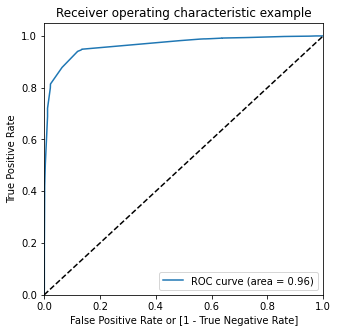

In [175]:
# Calling the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

In [176]:
# Lets create column with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.008750,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.425624,6795,0,1,1,1,1,1,0,0,0,0,0
2,0,0.008750,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.065190,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.425624,3934,0,1,1,1,1,1,0,0,0,0,0


In [177]:
# Now lets calculate accuracy,sensitivity and specificity for various probabilty cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.895949,0.948905,0.863318
0.2,0.2,0.897650,0.945661,0.868066
0.3,0.3,0.903370,0.940389,0.880560
0.4,0.4,0.914038,0.878345,0.936032
0.5,0.5,0.915275,0.814274,0.977511
0.6,0.6,0.915275,0.814274,0.977511
0.7,0.7,0.909864,0.799270,0.978011
0.8,0.8,0.909864,0.799270,0.978011
0.9,0.9,0.885745,0.719789,0.988006


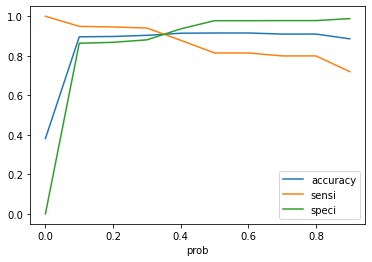

In [178]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [179]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.008750,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.425624,6795,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.008750,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.065190,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.425624,3934,0,1,1,1,1,1,0,0,0,0,0,1


In [180]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Conversion_prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Conversion_prob,Prospect ID,final_predicted,Lead_Score
0,0,0.008750,1871,0,1
1,0,0.425624,6795,1,43
2,0,0.008750,3516,0,1
3,0,0.065190,8105,0,7
4,0,0.425624,3934,1,43


In [181]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9033704390847248

In [182]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3524,  478],
       [ 147, 2319]], dtype=int64)

In [183]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [184]:
# Calculating the sensitivity
TP/(TP+FN)

0.940389294403893

In [185]:
# Calculating the specificity
TN/(TN+FP)

0.88055972013993

In [186]:
precision_score(y_train_pred_final.Converted,  y_train_pred_final.final_predicted)

0.8291026099392206

In [187]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.940389294403893

### With the current cut off as 0.3 we have accuracy of 90%, sensitivity of 94%, specificity of around 88%,
### precision_score 82% and recall score 94% 

## Prediction on Test set

In [188]:
numeric_cols = X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
4269,1.900034,0.964504,0.478944,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,-1.148883,-0.885371,-1.240087,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7766,0.756690,-0.777416,1.624964,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9199,-1.148883,-0.885371,-1.240087,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4359,-1.148883,-0.885371,-1.240087,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [189]:
X_test = X_test[col]
X_test.head()

,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
4269,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2376,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
7766,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9199,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4359,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [190]:
X_test_sm = sm.add_constant(X_test)

## Apply Prediction on test dataset

In [191]:
y_test_pred = res.predict(X_test_sm)

In [192]:
y_test_pred[:10]

4269    0.378436
2376    0.994013
7766    0.965227
9199    0.005675
4359    0.954580
9186    0.994013
1631    0.954580
8963    0.954580
8007    0.071552
5324    0.994013
dtype: float64

In [193]:
# Converting y_pred to a dataframe which is an array
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
4269,0.378436
2376,0.994013
7766,0.965227
9199,0.005675
4359,0.954580


In [194]:
y_test_1 = pd.DataFrame(y_test)

In [195]:
# Putting CustID to index
y_test_1['Prospect ID'] = y_test_1.index

In [196]:
# Removing index for both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test_1.reset_index(drop=True, inplace=True)

In [197]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_1, y_pred],axis=1)

In [198]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.378436
1,1,2376,0.994013
2,1,7766,0.965227
3,0,9199,0.005675
4,1,4359,0.954580


In [199]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.378436
1,1,2376,0.994013
2,1,7766,0.965227
3,0,9199,0.005675
4,1,4359,0.954580


In [200]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.378436,38
1,2376,1,0.994013,99
2,7766,1,0.965227,97
3,9199,0,0.005675,1
4,4359,1,0.954580,95


In [201]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.378436,38,1
1,2376,1,0.994013,99,1
2,7766,1,0.965227,97,1
3,9199,0,0.005675,1,0
4,4359,1,0.954580,95,1


In [202]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9098124098124099

In [203]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1469,  208],
       [  42, 1053]], dtype=int64)

In [204]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [205]:
# Let's see the sensitivity
TP / float(TP+FN)

0.9616438356164384

In [206]:
# Let us calculate specificity
TN / float(TN+FP)

0.875968992248062

In [207]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8350515463917526

In [208]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9616438356164384

 ### for the test data, we have accuracy of 90%, sensitivity of 96%, specificity of around 87%,presion_score 83% and recall_score 96%